<a href="https://colab.research.google.com/github/churry75/tf_tutorial/blob/master/tf_tutorial_09_CNN_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 간단한 CNN 이미지 분류 모델 구현

## 필요한 라이브러리 import

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 데이터셋 로드
- CIFAR-10 데이터셋 로드

In [ ]:
(train_sets, valid_sets, test_sets), info = tfds.load(name='cifar10', split=['train[:85%]', 'train[85%:]', 'test'], with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompletePAO4CD/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompletePAO4CD/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
class_names = info.features['label'].names

In [ ]:
def preprocessing(item):
    images = item['image']
    images = tf.cast(images, tf.float32) / 255.0
    labels = item['label']
    return images, labels

In [ ]:
train_sets = train_sets.map(preprocessing).shuffle(10000).batch(128).prefetch(1)
valid_sets = valid_sets.map(preprocessing).shuffle(10000).batch(128).prefetch(1)
test_sets = test_sets.map(preprocessing).shuffle(10000).batch(128).prefetch(1)

## 모델 생성
- 함수형 API를 사용하여 모델 생성

In [ ]:
_input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(_input)
x = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = keras.layers.Conv2D(256, (3, 3), (1, 1),
                        padding='same', activation='relu')(x)
x = keras.layers.Conv2D(256, 3,
                        padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
_output = keras.layers.Dense(10, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=_input, outputs=_output)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0   

## 모델 컴파일
- 최적화 기법: 확률적 경사 하강법
- 손실함수: 교차 엔트로피



In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

## 모델 훈련

In [ ]:
histo = model.fit(train_sets, validation_data=valid_sets, epochs=100)

Epoch 1/100
333/333 [==============================] - 10s 27ms/step - loss: 2.0087 - accuracy: 0.2477 - val_loss: 2.1426 - val_accuracy: 0.2139
Epoch 2/100
333/333 [==============================] - 9s 27ms/step - loss: 1.9384 - accuracy: 0.2733 - val_loss: 1.8642 - val_accuracy: 0.3289
Epoch 3/100
333/333 [==============================] - 9s 27ms/step - loss: 1.8816 - accuracy: 0.2953 - val_loss: 1.7404 - val_accuracy: 0.3623
Epoch 4/100
333/333 [==============================] - 9s 27ms/step - loss: 1.8348 - accuracy: 0.3135 - val_loss: 1.7219 - val_accuracy: 0.3636
Epoch 5/100
333/333 [==============================] - 9s 27ms/step - loss: 1.7935 - accuracy: 0.3343 - val_loss: 1.7922 - val_accuracy: 0.3417
Epoch 6/100
333/333 [==============================] - 9s 27ms/step - loss: 1.7494 - accuracy: 0.3542 - val_loss: 1.8674 - val_accuracy: 0.3025
Epoch 7/100
333/333 [==============================] - 9s 27ms/step - loss: 1.7230 - accuracy: 0.3656 - val_loss: 4.7959 - val_accuracy

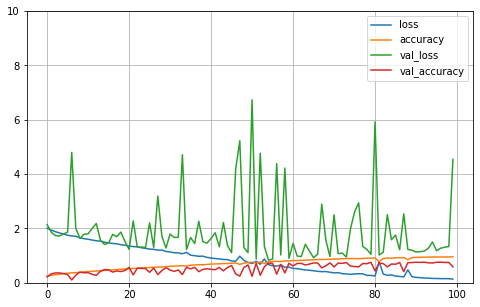

In [ ]:
pd.DataFrame(histo.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_sets)

79/79 [==============================] - 2s 11ms/step - loss: 4.6496 - accuracy: 0.5808
